In [1]:
import torch

import torchvision 

from torchvision import datasets

import torchvision.transforms as transforms

import torch.nn as nn

import torch.nn.functional as F

import numpy as np

import matplotlib.pyplot as plt


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Data

In [3]:
train_data = datasets.MNIST('./data', train = True, transform = transforms.ToTensor(), download = True)
# ToTensor를 적용해서 0 ~ 255 사이의 값을 0 ~ 1 사이의 값으로 변환시켜줌

In [4]:
test_data = datasets.MNIST('./test', train = False, transform = transforms.ToTensor(), download = True)

### Data Loader

#### train_loader
train_data의 이미지 개수는 60000개

60000번을 한번에 처리하기 힘들기 때문에 batch size를 정해서 한번의 epoch에 batch size씩 처리

batch size를 100으로 했기 때문에 train_loader의 크기는 600

따라서 총 600번의 step을 할 예정


#### test_loader
test_data의 이미지 개수는 10000개

마찬가지로 batch size를 100으로 해서 test_loader의 크기는 100



In [5]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 100, shuffle = True)

In [6]:
test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 100, shuffle = True)

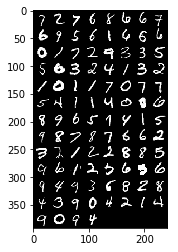

In [7]:
# 이미지 출력하는 함수

def imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))# width, height, channel 형태로 변경하는 것 
    plt.show()
    

# pytorch는 이미지 데이터셋을 [Batch Size, channel, width, height] 순서대로 저장하기 때문에
# matplotlib로 출력하기 위해서는 각 이미지를 [width, height, channel] 형태로 변경해 줄 필요가 있다.
    
    
dataiter = iter(train_loader) # train_loader의 반복자 구하기
images, labels = dataiter.next() # dataiter의 다음 요소 구하기


imshow(torchvision.utils.make_grid(images))



#### model 구현 & loss & optimizer


1. 어떤 loss를 쓸지
2. 어떤 optimizer를 쓸지
3. 학습 횟수는 몇번으로 할 지
4. learning rate는 몇으로 할 지
5. 매 epoch, 매 iteration마다 back-propagation을 통해 모델의 파라미터를 업데이트

In [10]:
input_size = 784  # 이미지가 28 * 28 = 784
hidden_size = 784
num_classes = 10
learning_rate = 0.01

layer1 = torch.nn.Linear(input_size, hidden_size, bias = True)
layer2 = torch.nn.Linear(hidden_size,num_classes, bias = True)
relu = torch.nn.ReLU()
model = torch.nn.Sequential(layer1, relu, layer2).to(device) # layer1, relu, layer2 거침   

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    

#### Train the model

In [11]:
epochs = 10
total_step = len(train_loader)

for e in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # train_loader에서 100개씩
        # train_loader의 데이터는 image와 label의 형태로 되어 있음
        
        images = images.reshape(100,784).to(device) # 28 * 28 크기의 이미지를 784 크기로 변경
        # image의 차원을 1차원으로 만들기 (784 크기로)
        
        labels = labels.to(device)
        
        optimizer.zero_grad() # model의 gradient 값을 0으로 저장
        output = model(images) # 모델을 forward해서 결과 저장
        
        cost = loss(output, labels) # output과 label의 loss 계산
        cost.backward() # backward 호출해서 gradient 계산
        optimizer.step() # 모델의 학습 파라미터 갱신
        
        if((i + 1) % 100 == 0):
            print('epoch : {} / {} | step: {} / {} | loss: {:.4f}'.format(e + 1, epochs, i + 1,total_step, cost.item()))
    

    

epoch : 1 / 10 | step: 100 / 600 | loss: 0.1511
epoch : 1 / 10 | step: 200 / 600 | loss: 0.1893
epoch : 1 / 10 | step: 300 / 600 | loss: 0.2032
epoch : 1 / 10 | step: 400 / 600 | loss: 0.1622
epoch : 1 / 10 | step: 500 / 600 | loss: 0.1206
epoch : 1 / 10 | step: 600 / 600 | loss: 0.1915
epoch : 2 / 10 | step: 100 / 600 | loss: 0.1030
epoch : 2 / 10 | step: 200 / 600 | loss: 0.1562
epoch : 2 / 10 | step: 300 / 600 | loss: 0.1552
epoch : 2 / 10 | step: 400 / 600 | loss: 0.1110
epoch : 2 / 10 | step: 500 / 600 | loss: 0.1265
epoch : 2 / 10 | step: 600 / 600 | loss: 0.0215
epoch : 3 / 10 | step: 100 / 600 | loss: 0.0325
epoch : 3 / 10 | step: 200 / 600 | loss: 0.0176
epoch : 3 / 10 | step: 300 / 600 | loss: 0.1145
epoch : 3 / 10 | step: 400 / 600 | loss: 0.0597
epoch : 3 / 10 | step: 500 / 600 | loss: 0.0685
epoch : 3 / 10 | step: 600 / 600 | loss: 0.1498
epoch : 4 / 10 | step: 100 / 600 | loss: 0.0135
epoch : 4 / 10 | step: 200 / 600 | loss: 0.0082
epoch : 4 / 10 | step: 300 / 600 | loss:

#### Test the model

#### 전체 10000개의 이미지를 가지고 test를 해본다.


Test: 10 | Accuracy: 96.2 
Test: 20 | Accuracy: 96.1 
Test: 30 | Accuracy: 96.76666666666667 
Test: 40 | Accuracy: 96.9 
Test: 50 | Accuracy: 96.92 
Test: 60 | Accuracy: 97.0 
Test: 70 | Accuracy: 96.92857142857143 
Test: 80 | Accuracy: 96.9375 
Test: 90 | Accuracy: 97.05555555555556 


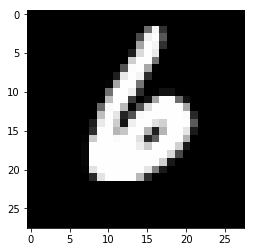

predict:  6
original label:  6


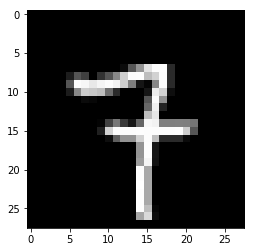

predict:  7
original label:  7


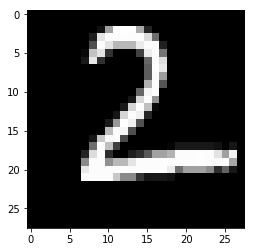

predict:  2
original label:  2


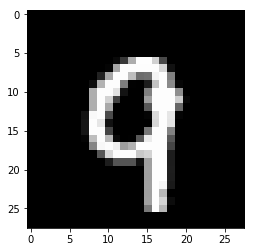

predict:  9
original label:  9


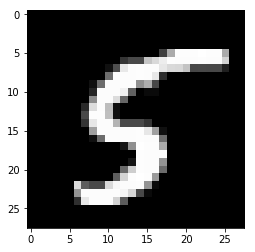

predict:  5
original label:  5
Test: 100 | Accuracy: 97.07 


In [15]:
model.eval() # evaluate mode로 전환
with torch.no_grad(): # 미분을 하지 않겠다
    correct = 0
    total = 0
    for i,(images, labels) in enumerate(test_loader):
        image = images.reshape(100,784).to(device)
        label = labels.to(device)
        
        output = model(image)
        _, predict = torch.max(output.data, 1)
        # 100행 10열로 되어있는데 각 행 에서 가장 큰 인덱스값이 label
        
        if (i >= 95 and i <= 100):
            imshow(torchvision.utils.make_grid(images[i]))
            print("predict: ", predict[i].item())
            print("original label: ", label[i].item())

            
        total += label.size(0)
        correct += (predict == label).sum().item() # predict와 원래 label이 일치하면 +
       
        if((i + 1)% 10 == 0):
            print('Test: {} | Accuracy: {} '.format(i + 1, 100 * correct / total))        